In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from functions_IB import kl_divergence, entropy, mutual_information

In [3]:
from functions_geom_DIB import generate_gaussian_points, add_index_to_data, px_i, calculate_probabilities
from functions_geom_DIB import geom_DIB, plot_clusters, DIB_curve

<h2> Test the algorithm on four points </h2>

In [4]:
data = [[0,0], [1,1], [5,5], [6.5,6.5]]
data_indexed = add_index_to_data(data)
data_px_given_i, data_joint_pix = calculate_probabilities(data_indexed)
# Run the iterative algorithm
q_t_given_x, q_t, q_y_given_t = geom_DIB(data_joint_pix, max_iter=10, beta = 0.5)

# Print the resulting distributions
print("\nq(t|x):")
print(q_t_given_x)
print("\nq(t):")
print(q_t)
print("\nq(y|t):")
print(q_y_given_t)


q(t|x):
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

q(t):
[0.47457627 0.02259887 0.47457627 0.02824859]

q(y|t):
[[4.99999989e-01 4.99999970e-01 4.11399755e-08 2.66389276e-14]
 [2.68941399e-01 7.31058518e-01 8.22697981e-08 5.32775278e-14]
 [6.28186749e-12 5.09025308e-08 4.99999954e-01 4.99999995e-01]
 [4.05078305e-19 6.59284350e-14 9.53494649e-02 9.04650535e-01]]


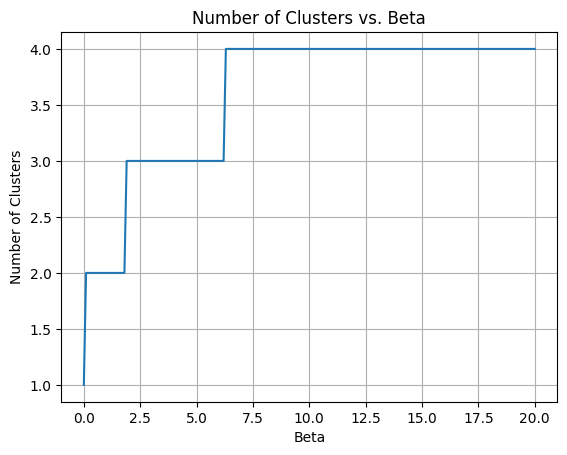

In [5]:
# Define a range of beta values
betas = np.linspace(0, 20, 201)

# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB(data_joint_pix, max_iter=100, beta=beta)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

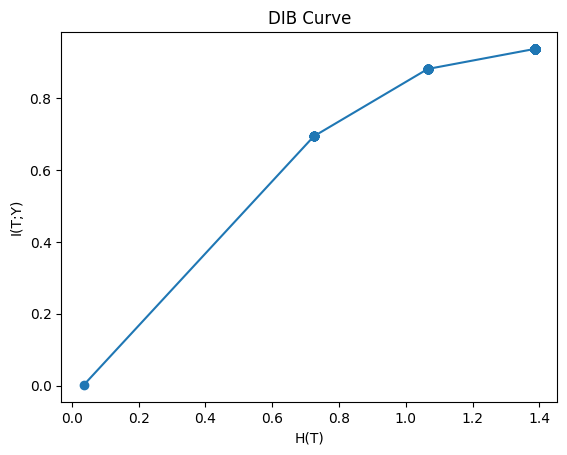

In [6]:
beta_values = np.linspace(0, 20, 201)
DIB_curve(data_joint_pix, beta_values, max_iter=100)


<h2> Test the algorithm on gaussian points </h2>

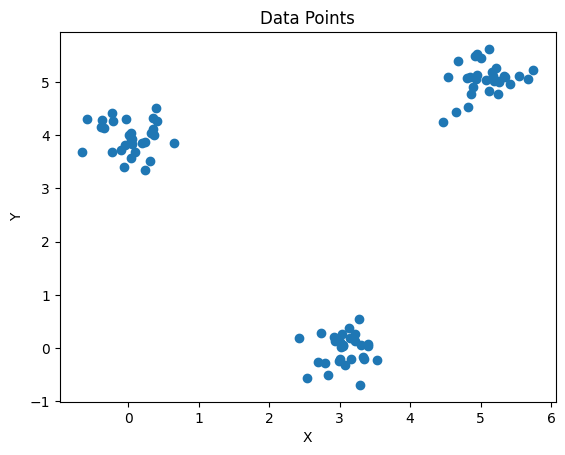

In [16]:
num_points_per_distribution = 30
mean_list = [[3, 0], [0, 4], [5, 5]]
cov_list = [[[.1, 0], [0, .1]], [[.1, 0], [0, .1]], [[.1, 0], [0, .1]]]

# Generate Gaussian points
points_gaussian = generate_gaussian_points(num_points_per_distribution, mean_list, cov_list)

# Plot the points
plt.scatter(points_gaussian[:, 0], points_gaussian[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points')
plt.show()


In [17]:
data_with_index = add_index_to_data(points_gaussian)
p_x_given_i, p_ix = calculate_probabilities(data_with_index)

In [22]:
# Run the iterative algorithm
q_t_given_x, q_t, q_y_given_t = geom_DIB(p_ix, max_iter=50, beta = 1e10)

Iteration: 0 out of 50
Iteration: 1 out of 50
Iteration: 2 out of 50
Iteration: 3 out of 50
Iteration: 4 out of 50
Iteration: 5 out of 50
Iteration: 6 out of 50
Iteration: 7 out of 50
Iteration: 8 out of 50
Iteration: 9 out of 50
Iteration: 10 out of 50
Iteration: 11 out of 50
Iteration: 12 out of 50
Iteration: 13 out of 50
Iteration: 14 out of 50
Iteration: 15 out of 50
Iteration: 16 out of 50
Iteration: 17 out of 50
Iteration: 18 out of 50
Iteration: 19 out of 50
Iteration: 20 out of 50
Iteration: 21 out of 50
Iteration: 22 out of 50
Iteration: 23 out of 50
Iteration: 24 out of 50
Iteration: 25 out of 50
Iteration: 26 out of 50
Iteration: 27 out of 50
Iteration: 28 out of 50
Iteration: 29 out of 50
Iteration: 30 out of 50
Iteration: 31 out of 50
Iteration: 32 out of 50
Iteration: 33 out of 50
Iteration: 34 out of 50
Iteration: 35 out of 50
Iteration: 36 out of 50
Iteration: 37 out of 50
Iteration: 38 out of 50
Iteration: 39 out of 50
Iteration: 40 out of 50
Iteration: 41 out of 50
It

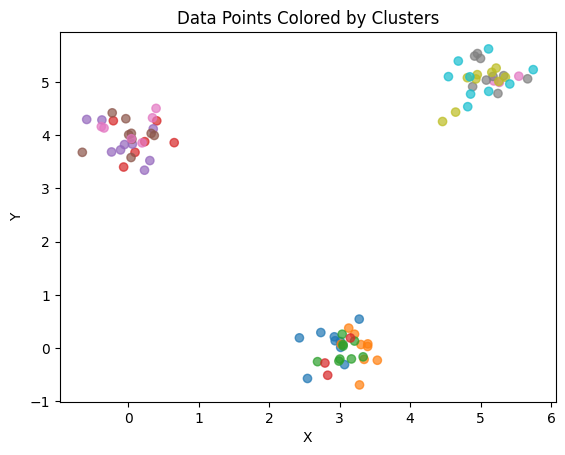

In [23]:
plot_clusters(points_gaussian, q_t_given_x)

In [11]:
q_t_given_x_v1, q_t_v1, q_y_given_t_v1 = geom_DIB(p_ix, max_iter=50, beta = 90)
I_TY_v1 = mutual_information(q_t_v1.reshape(-1, 1) * q_y_given_t_v1)
H_T_v1 = entropy(q_t_v1)

print(H_T_v1, I_TY_v1)

1.5079601107344376 1.1014658289970871


In [12]:
np.linspace(4, 500, 9)

array([  4.,  66., 128., 190., 252., 314., 376., 438., 500.])

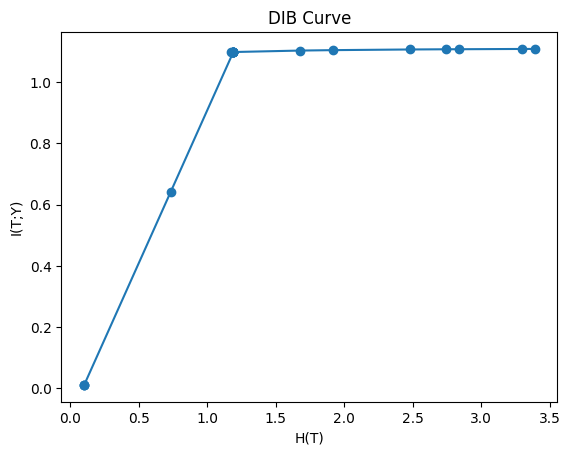

In [13]:
x= np.linspace(4, 500, 9)
y=np.linspace(0,1, 11)
z=np.append(y,x)
beta_values = z
DIB_curve(p_ix, beta_values, max_iter=50)

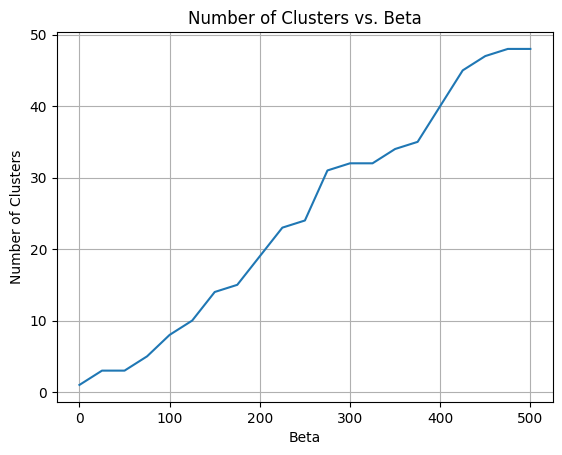

In [15]:
# Define a range of beta values
betas = np.linspace(0, 500, 21)

# Initialize an empty list to store the number of clusters
num_clusters_list = []

# Iterate over each beta value
for beta in betas:
    # Run iterative_algorithm to obtain q_t_given_x
    q_t_given_x, _, _ = geom_DIB(p_ix, max_iter=50, beta=beta)
    
    # Calculate the number of clusters
    column_sum = np.sum(q_t_given_x, axis=0)
    num_clusters = np.count_nonzero(column_sum)
    
    # Append the number of clusters to the list
    num_clusters_list.append(num_clusters)

# Plot the number of clusters against beta values
plt.plot(betas, num_clusters_list)
plt.xlabel('Beta')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters vs. Beta')
plt.grid(True)
plt.show()

<h2> Test on another Gaussian dataset where clusters are less obvious. </h2>

In [16]:
# Set parameters
num_points_per_distribution = 10
mean_list = [[3, 0], [0, 4], [4, 4]]
cov_list = [[[0.6, 0], [0, 0.6]], [[0.6, 0], [0, 0.6]], [[0.6, 0], [0, 0.6]]]

# Generate Gaussian points
gaussian_points_v2 = generate_gaussian_points(num_points_per_distribution, mean_list, cov_list)

# Add index to the data
data_with_index_v2 = add_index_to_data(gaussian_points_v2)

# Calculate distributions
p_x_given_i_v2, p_ix_v2 = calculate_probabilities(data_with_index_v2)


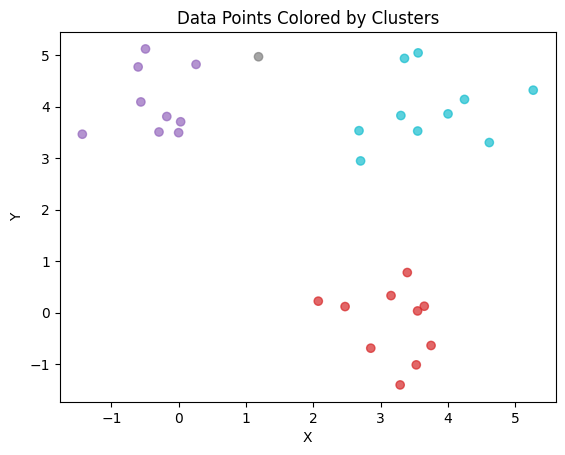

In [17]:
# Apply geometric information bottleneck algorithm
q_t_given_x_v2, q_t_v2, q_y_given_t_v2 = geom_DIB(p_ix_v2, max_iter=100, beta = 3)

# Plot the clusters
plot_clusters(gaussian_points_v2, q_t_given_x_v2)


-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
-------------------------------------------------
<h2> Maybe useful later </h2>

<h2> From data points, we have a function that gives p(x,y), p(y|x) and p(x). We can now begin the information bottleneck algorithm. </h2> 

In [ ]:
def compute_distributions(points, bins):
    """
    Compute joint, marginal, and conditional distributions based on given points and bins.

    Parameters:
    - points (ndarray): Array of points in the form of (x, y) coordinates.
    - bins (int or sequence): Number of bins or sequence of bin edges for each dimension.

    Returns:
    - joint_distribution (ndarray): Joint distribution p(x, y) computed by slicing the plane into nxn bins.
    - marginal_distribution_x (ndarray): Marginal distribution p(x) computed by summing the joint distribution along the x-axis.
    - conditional_distribution_y_given_x (ndarray): Conditional distribution p(y|x) computed by dividing the joint distribution by the marginal distribution along the x-axis.

    """
    # Compute joint distribution p(x,y) by slicing the plane into nxn bins
    joint_distribution, _ = np.histogramdd(points, bins, density=True)
    
    # Compute marginal distribution p(x)
    marginal_distribution_x = np.sum(joint_distribution, axis=1)
    
    # Compute conditional distribution p(y|x)
    conditional_distribution_y_given_x = joint_distribution / marginal_distribution_x[:, np.newaxis]
    
    return joint_distribution, marginal_distribution_x, conditional_distribution_y_given_x